# Text Classification using CNN
Text classification is a fundamental task in natural language processing (NLP) that involves assigning predefined categories to textual data. This technique is widely used in applications like sentiment analysis, spam detection, and topic classification. The advent of deep learning has significantly improved the performance of text classification tasks by leveraging complex neural networks.

This notebook focuses on text classification using Convolutional Neural Networks (CNNs), which are traditionally known for image processing but have shown remarkable results in NLP tasks. The CNN's ability to extract local features and hierarchical patterns makes it a powerful tool for modeling textual data.

Notebook Structure:

Model 1:
Introduces the first CNN-based architecture for text classification and provides insights into its training process.
Observations:
Presents the outcomes and observations from Model 1, highlighting its performance and potential limitations.
Part 2 (Character Embedding):
Explores the impact of character-level embeddings as input to CNN, which enables the model to capture finer granularity and handle out-of-vocabulary words effectively.
Model 2:
Implements an enhanced CNN architecture incorporating character embeddings and examines its results.
Observations:
Summarizes the results and compares the performance of the two models, providing a comprehensive analysis of the approaches.
This structured approach aims to demonstrate how CNNs can be effectively used for text classification tasks and to evaluate the impact of different embedding techniques on model performance.

In [ ]:
#importing soke libraries
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook as tqdm
import re
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
import matplotlib.pyplot as plt
import tensorflow as tf

#to unrar the given file
!pip install pyunpack
!pip install patool
from pyunpack import Archive

In [ ]:
#modules for chunking
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
nltk.download('punkt')

In [ ]:
dir_path='/content/sample_data/Assignment 22/documents'
no_of_docs=len(os.listdir(dir_path))
print('No. of docs : ',no_of_docs)

No. of docs :  18828


#-------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# functions which are going to be useful in below preprocessing steps
def j9(j8):
    #print('j8',j8)
    j9=j8.split('_')
    #print('j9',j9)
    return(j9[1])#

def j11(j8):
    #print('j81',j8)
    j9=j8.split('_')
    #print('j91',j9)
    return(j9[0])#


In [ ]:
def chunk_name_person(j5):

    ''' function to do chunking in the email Text part '''

    parse_tree = ne_chunk(pos_tag(word_tokenize(j5)))
    #print('p')
    for elt in parse_tree:
        #print(elt)
        if isinstance(elt, nltk.Tree):
            #print('elt : ',elt)
            if(elt.label())=='GPE':
                g=[]
                for w, t in elt:
                    #print(w)
                    #print(t)
                    w=re.sub(r'[^A-Za-z]+','',w)
                    g.append(w)
                g_old=" ".join(g)
                g_='_'.join(g)
                #print(g_old)
                #print(g_)
                j5=re.sub(g_old,g_,j5)

            if(elt.label())=='PERSON':
                p=[]
                for w, t in elt:
                    #print(w)
                    w=re.sub(r'[^A-Za-z]+','',w)
                    p.append(w)
                p=r' '.join(p)
                #print(p)
                j5=re.sub(p,r'',j5)

    return(j5)

In [ ]:
def preprocess_text(txt):

      ''' function for the preprocessing of the Text part of the Email '''


    k=re.sub(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z0-9]+\.?[a-zA-Z]*",' ',txt)

    y=re.sub(r'Subject:\s+(Re:)?\s?(.+)',' ',k)

    j=re.sub( r'\bFrom:.*'," ",y)

    j=re.sub( r'\bWrite to:.*'," ",j)

    j1=re.sub(r'<.*>','',j)

    j2=re.sub(r'\(.*\)','',j1)

    j3=re.sub(r'\n+',"",j2)

    j3=re.sub(r'\t+',"",j3)

    j3=re.sub(r'-+',"",j3)

    j3=re.sub(r'\\+',"",j3)

    j4=re.sub(r'[\w\d]+:', '',j3)

    j5=re.sub(r'(can|Can)\'t',"can not",j4)

    j5=re.sub(r'\'s'," is",j5)

    j5=re.sub(r'(i|I)\'have',"i have",j5)

    j5=re.sub(r'(you|You)\'re',"you are",j5)

    j5=re.sub(r'(i|I)\'ll',"i will",j5)

    j5=re.sub(r'(i|I)\'m',"i am",j5)

    j5=re.sub(r'(i|I)\'ll',"i will",j5)

    j5=re.sub(r'n\'t'," not ",j5)

    j5=re.sub(r'\'d'," would",j5)

    j6=chunk_name_person(j5)

    j7=re.sub(r'\d+','',j6)

    j8=re.findall(r'\b_+\w+\b',j7)
    for i in j8:
        j7=re.sub(i,j9(i),j7)

    j10=re.findall(r'\b[A-Za-z0-9]+_+\b',j7)
    for i in j10:
        j7=re.sub(i,j11(i),j7)

    j12=re.findall(r'\b[a-zA-Z]{1,2}_[a-zA-Z]+',j7)
    for i in j12:
        j7=re.sub(i,j9(i),j7)

    j7=j7.lower()

    j7=re.sub(r'\b\w{1,2}\b','',j7)

    j7=re.sub(r'\b\w{15,100}\b','',j7)

    j7=re.sub(r'[^A-Za-z_]+',' ',j7)

    return j7

In [ ]:
def preprocess_email(input):

    ''' function for the preprocessing of the email Ids'''

    emails = re.findall(r"[a-zA-Z0-9\.\-+_]+@[a-zA-Z0-9\.\-+_]+\.[a-zA-Z0-9]+\.?[a-zA-Z]*", input)
    email=emails.copy()
    #print(emails)
    p_email=[]
    for e in range(len(emails)):
    #print(e)
        emails[e]= re.findall(r'@([a-zA-Z0-9\.\-+_]+)',emails[e])
        emails[e]=emails[e][0]
        emails[e]=emails[e].split('.')
        for i in range(len(emails[e])):
            if len(emails[e][i]) <=2:
                #print(emails[e][i])
                emails[e][i]=''
            if emails[e][i]!='':
                p_email.append(emails[e][i])

    return p_email

In [ ]:
def preprocess_sub(input_txt):

    ''' function for the preprocessing of the Subjects and
        added some extra preprocessing steps which were not present in the task
        as subject also contains \n,\t,etc.. (some special characters)'''

    k=re.findall(r'Subject:\s+(Re:)?\s?(.+)',input_txt)
    ks=k[0][1]
    j3=re.sub(r'[^\w\d\s]','',ks)
    j3=re.sub(r'\n+',"",j3)
    j3=re.sub(r'\t+',"",j3)
    j3=re.sub(r'-+',"",j3)
    j7=re.sub(r'\\+',"",j3)
    j7=j7.lower()
    j7=re.sub(r'\b\w{1,2}\b','',j7)
    j7=re.sub(r'\b\w{15,100}\b','',j7)
    j7=re.sub(r'[^A-Za-z_]+',' ',j7)
    out_txt=re.sub(r'(\s\s)+',' ',j7)

    return out_txt

In [ ]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""

    list_of_preproessed_emails=preprocess_email(Input_Text)

    subject=preprocess_sub(Input_Text)

    text=preprocess_text(Input_Text)



    return (list_of_preproessed_emails,subject,text)

#-----------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#opening the given file as asked in assignment
f=open('/content/sample_data/Assignment 22/documents/'+'alt.atheism_49960.txt','r',encoding='cp1252')
f1=str(f.read())
f.close
f1

'From: mathew <mathew@mantis.co.uk>\nSubject: Alt.Atheism FAQ: Atheist Resources\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.\n\nWrite to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.\n\nPeople in the San Francisco Bay area c

In [ ]:
#for evaluation purpose 'alt.atheism_49960.txt'
pre=preprocess(f1)
pre

(['mantis', 'netcom', 'com', 'mantis'],
 'altatheism faq atheist resources',
 ' atheism december atheist resources addresses atheist organizations usafreedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia areavailable from the freedom from religion foundation the evolution designs sell the fish fish symbol like the oness stick their cars but with feet and the word writteninside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get fish from try mailing for net people who directly theprice per fish american atheist pressaap publish various atheist books critiques the bible lists ofbiblical contradictions and one such book the bible handbook and american atheist press isbn edition bible contradictions absurdities atrocities immoralities contains the itself aap based the king version the bible austin prometheus bookssell books including holy horrors alternate address prometheus books for humanisman organization promo

In [ ]:
#getting preprocessed email,subject and text for each individual and appending in a list
print('No. of docs : ',no_of_docs)
e=[]
s=[]
t=[]
label_list=[]
for i in tqdm(range(no_of_docs)):
    l=os.listdir(dir_path)[i]
    label_list.append(l.split('_')[0])
    f=open(('/content/sample_data/Assignment 22/documents/'+os.listdir(dir_path)[i]),'r',encoding='cp1252')
    a=(str(f.read()))
    r=preprocess(a)
    e.append(r[0])
    s.append(r[1])
    t.append(r[2])
    #print('#'*120)
    f.close()
    #No. of docs :  18828

In [ ]:
#just for checking !!
print('1st document preprocessed subject : \n',s[0])
print('1st document preprocessed email : \n',e[0])
print('1st document preprocessed text : \n',t[0])

1st document preprocessed subject : 
 death penalty gulf war long
1st document preprocessed email : 
 ['minster', 'york', 'snake2', 'wisc', 'edu']
1st document preprocessed text : 
  mccullough prove have source that says that date the civilian death about have never seen any source that was claiming such figure post the source its reliability can judged this figure would not simply deaths bombing but also death laterfrom disease andstarvation believe but when get copy the latest research injune july that this was the figure proposed the census bureau report the matter the report was suppressed and the attempted tosack the author the report but failed due procedural technicality the author now permanent leave 


In [ ]:
#appending subject and email into one list
for i in range(len(s)):
    for j in e[i]:
        s[i]=s[i]+' '+j


In [ ]:
#appending subject, email and text into one list
for i in range(len(t)):
    t[i]=t[i]+' '+s[i]

In [ ]:
#sample of appended preprocessed email
t[0]

' mccullough prove have source that says that date the civilian death about have never seen any source that was claiming such figure post the source its reliability can judged this figure would not simply deaths bombing but also death laterfrom disease andstarvation believe but when get copy the latest research injune july that this was the figure proposed the census bureau report the matter the report was suppressed and the attempted tosack the author the report but failed due procedural technicality the author now permanent leave  death penalty gulf war long minster york snake2 wisc edu'

In [ ]:
#converting the list into a single dataframe
data=pd.DataFrame(list(zip(t,label_list)),columns=['Preprocessed_Text','label'])
data_l=len(data)
print( 'No. of points in dataframe : ',data_l)
data.head(10)

In [ ]:
#transfering the dataframe into a single .csv file
data.to_csv('/content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/data.csv')

#--------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#reading the .csv file
#Note: we have preprocessed text of email

data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/data.csv')
data=data.drop('Unnamed: 0',axis=1)
print('Shape : ',data.shape)
data.head(3)


Shape :  (18828, 2)


,Preprocessed_Text,label
0,mccullough prove have source that says that d...,alt.atheism
1,posted this may looking for info products tha...,comp.windows.x
2,were dealership today looking buying car andt...,rec.autos


In [ ]:
#label encoding all the previously labels present
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['label'])
label_encoded=le.transform(data['label'])

data['numerical_label']=label_encoded
print('Shape : ',data.shape)
data.head(3)

Shape :  (18828, 3)


,Preprocessed_Text,label,numerical_label
0,mccullough prove have source that says that d...,alt.atheism,0
1,posted this may looking for info products tha...,comp.windows.x,5
2,were dealership today looking buying car andt...,rec.autos,7


In [ ]:
#splitting into train and test
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed_Text'], data['numerical_label'], test_size=0.25, stratify=data['numerical_label'])

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14121,) (4707,) (14121,) (4707,)


Text(0.5, 1.0, 'length of Preprocessed_Text')

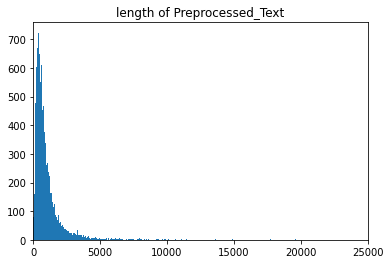

In [ ]:
#getting each document length
length=[]
for i in X_train:
    length.append(len(i))
length=np.array(length)

##plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(length,bins=1000)
plt.xlim(0,25000)
plt.title('length of Preprocessed_Text')

The above plot shows that majority of the file has a length of around 7000, this information will be beneficial for the selection of padding of the sequences.

In [ ]:
print('max_length of sentences : ',max(length))
print('avg_length of sentences : ',int(np.mean(length)))

max_length of sentences :  48679
avg_length of sentences :  1138


In [ ]:
#tokenising, encoding and padding the sequences

from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer( filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
print('No. of words tokenized : ',len(tokenizer.word_index.keys()))
vocab_size=len(tokenizer.word_index)+1
print('Vocab size of embedding layer : ',vocab_size)

encoded_X_train=tokenizer.texts_to_sequences(X_train)
encoded_X_test=tokenizer.texts_to_sequences(X_test)

#sequence padding
from keras.preprocessing.sequence import pad_sequences
padded_X_train=pad_sequences(encoded_X_train,maxlen=7000)
padded_X_test=pad_sequences(encoded_X_test,maxlen=7000)
padded_X_train[0].shape

Using TensorFlow backend.


No. of words tokenized :  130103
Vocab size of embedding layer :  130104


(7000,)

In [ ]:
#downloading the file of glove vectors
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.204925231.1589890430; _gid=GA1.2.1977977324.1590302429" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip" -c -O 'glove.6B.zip'

In [ ]:
#extracting glove vectors
Archive('/content/glove.6B.zip').extractall('/content/glove vectors')

In [ ]:
#reference=https://machinelearningmastery.com/start-here/
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/glove vectors/glove.6B.100d.txt')
for line in tqdm(f):
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


In [ ]:
embeddings_index['for']

array([-1.4401e-01,  3.2554e-01,  1.4257e-01, -9.9227e-02,  7.2536e-01,
        1.9321e-01, -2.4188e-01,  2.0223e-01, -8.9599e-01,  1.5215e-01,
        3.5963e-02, -5.9513e-01, -5.1635e-02, -1.4428e-02,  3.5475e-01,
       -3.1859e-01,  7.6984e-01, -8.7369e-02, -2.4762e-01,  6.5059e-01,
       -1.5138e-01, -4.2703e-01,  1.8813e-01,  9.1562e-02,  1.5192e-01,
        1.1303e-01, -1.5222e-01, -6.2786e-01, -2.3923e-01,  9.6009e-02,
       -4.6147e-01,  4.1526e-01, -3.0475e-01,  1.3710e-01,  1.6758e-01,
        5.3301e-01, -4.3658e-02,  8.5924e-01, -4.1192e-01, -2.1394e-01,
       -5.1228e-01, -3.1945e-01,  1.2662e-01, -3.1510e-01,  3.1429e-03,
        2.7129e-01,  1.7328e-01, -1.3159e+00, -4.2414e-01, -6.9126e-01,
        1.9017e-02, -1.3375e-01, -9.6057e-02,  1.7069e+00, -6.5291e-01,
       -2.6111e+00,  2.6518e-01, -6.1178e-01,  2.0950e+00,  3.8148e-01,
       -5.5823e-01,  2.0360e-01, -3.3704e-01,  3.7354e-01,  6.9510e-01,
       -1.6370e-03,  8.1885e-01,  5.1793e-01,  2.7746e-01, -3.71

In [ ]:
#reference=https://machinelearningmastery.com/start-here/
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
#print('embedding_matrix shape : ',embedding_matrix.shape)
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print('embedding_matrix shape : ',embedding_matrix.shape)

embedding_matrix shape :  (130104, 100)


#Model 1

In [ ]:
#importing layers from tensorflow module
from tensorflow.keras.layers import Conv1D,Dense,Embedding,Flatten,GlobalMaxPool1D,MaxPool1D,concatenate,Input,Activation,Dropout
from tensorflow.keras.models import Model

#installing library to save model weights
! pip install -q pyyaml h5py

#clearing the tf graph
tf.keras.backend.clear_session()
#clear the tensorboard graph
tf.compat.v1.reset_default_graph()

In [ ]:
import datetime
!rm -rf ./logs/  # clearing the previous logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # defing the log_dir
#loading the tensorboard extension
%load_ext tensorboard

from tensorflow.keras.callbacks import ModelCheckpoint
#defining the file path for saving the weights
filepath="/content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  save_weights_only=True, verbose=1, save_best_only=True, mode='max',save_freq='epoch')


#importing the ealy stopping for val_accuracy
ES=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=4, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

#built-in tensorboard call back
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True,write_grads=True)


callback_list=[checkpoint,ES,tensorboard_callback]

In [ ]:
#defining model-1

Input_shape=7000

input_layer_1=Input(shape=(Input_shape,))

embedding_1=Embedding(vocab_size,100,weights=[embedding_matrix],input_length=Input_shape,trainable=False)

embedding_layer=embedding_1(input_layer_1)

conv1_m=Conv1D(filters=16,kernel_size=3,strides=(1),padding='valid',activation='relu',data_format='channels_last')(embedding_layer)
conv1_n=Conv1D(filters=12,kernel_size=3,strides=(1),padding='valid',activation='relu')(embedding_layer)
conv1_o=Conv1D(filters=8,kernel_size=3,strides=(1),padding='valid',activation='relu')(embedding_layer)

concan_1=concatenate([conv1_m,conv1_n,conv1_o])

max_1=MaxPool1D(pool_size=2)(concan_1)

conv2_i=Conv1D(filters=14,kernel_size=3,strides=(1),padding='valid',activation='relu')(max_1)
conv2_j=Conv1D(filters=10,kernel_size=3,strides=(1),padding='valid',activation='relu')(max_1)
conv2_k=Conv1D(filters=18,kernel_size=3,strides=(1),padding='valid',activation='relu')(max_1)

concan_2=concatenate([conv2_i,conv2_j,conv2_k])

max_2=MaxPool1D(pool_size=2)(concan_2)

conv3_p=Conv1D(filters=8,kernel_size=3,activation='relu',strides=(1),padding='valid')(max_2)
max_3=MaxPool1D(pool_size=2)(conv3_p)

flat_1=Flatten()(max_3)

drop=Dropout(0.2)(flat_1)

dense_1=Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=None))(drop)

dense_2=Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=None))(dense_1)

output_layer_1=Dense(20,activation='softmax')(dense_2)

model_1 = Model(inputs=input_layer_1,outputs=output_layer_1)


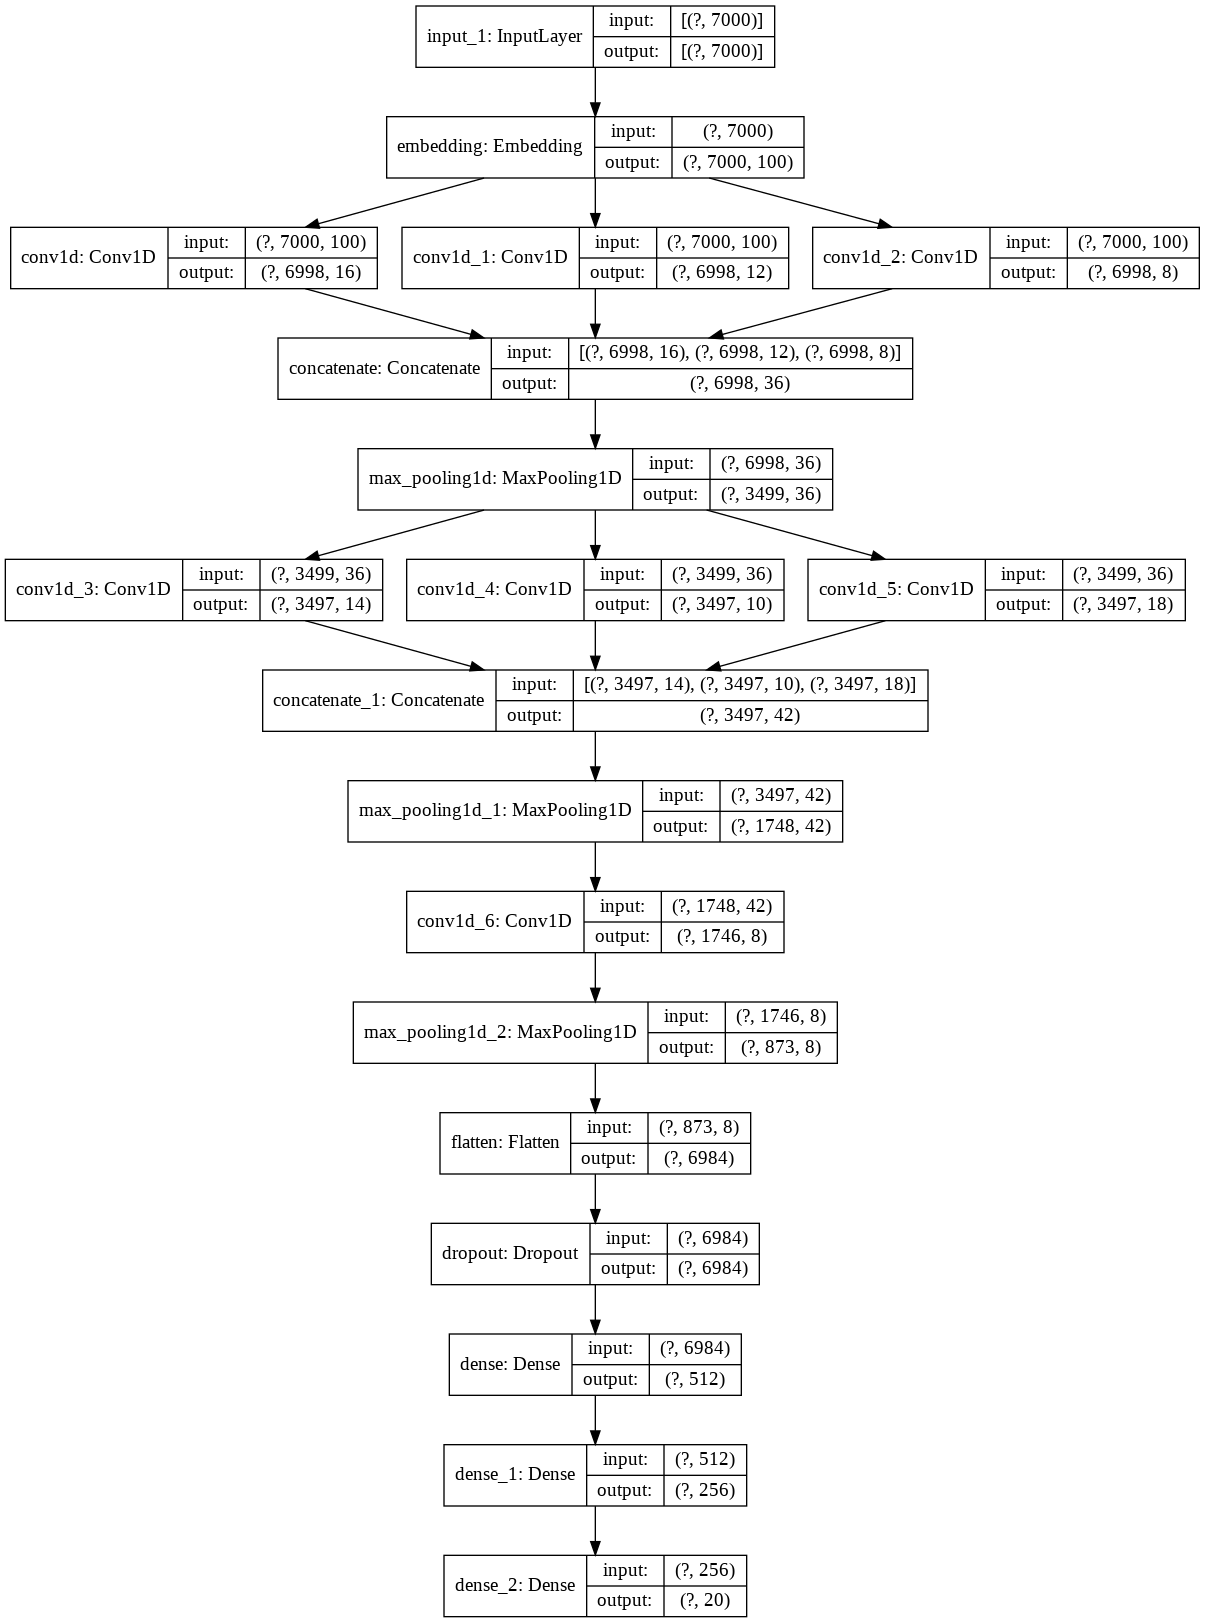

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'model_1.png', show_shapes=True)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 7000, 100)    13010400    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 6998, 16)     4816        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 6998, 12)     3612        embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
#compiling model-1
model_1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
#fitting model-1
model_1.fit(padded_X_train,y_train,steps_per_epoch=18,validation_data=(padded_X_test,y_test),epochs=100,callbacks=callback_list)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2.9826 - accuracy: 0.0741
Epoch 00001: val_accuracy improved from -inf to 0.09836, saving model to /content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5
18/18 [==============================] - 30s 2s/step - loss: 2.9826 - accuracy: 0.0741 - val_loss: 2.9685 - val_accuracy: 0.0984
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 2.9488 - accuracy: 0.1191
Epoch 00002: val_accuracy improved from 0.09836 to 0.15551, saving model to /content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5
18/18 [==============================] - 31s 2s/step - loss: 2.9488 - accuracy: 0.1191 - val_loss: 2.9160 - val_accuracy: 0.1555
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 2.8894 - accuracy: 0.1858
Epoch 00003: val_accuracy improved from 0.15551 to 0.21861, saving model to /content/drive/My Drive/Colab Notebooks/24-D

In [ ]:
%tensorboard --logdir logs/fit/ #to launch tensorboard
#screenshots have been attached in the seperate pdf file

#Observations :

(1) We have achieved around 58% validation accuracy for the first model with the given architecture for model-1, at 46th epoch out of 100

(2) The accuracy can be justified to the model architecture.

(3) I have also added a dense layer to the model's architecture after the flatten layer to improve accuracy.


Note: All the scalers of the tensorboard have been attached in the following pdf file model-1

Note: Micro averaged-F1 score is same as accuracy (here Validation Accuracy ), so need to calculate it seperately :  
https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1#:~:text=To%20calculate%20the%20micro%2DF1,TP%2F(TP%2BFP)).

#Part 2 (Character embedding)

In [ ]:
#preprocessing for character embedding of X_train once again to remove spaces etc.

X_train_ce=pd.DataFrame(columns=['Preprocessed CE'])
for i in tqdm(X_train):

    j3=re.sub(r'\n+',"",i)
    j3=re.sub(r'\t+',"",j3)
    j3=re.sub(r'-+',"",j3)
    j3=re.sub(r' ',"",j3)
    j3=re.sub(r'  ',"",j3)
    j7=re.sub(r'\\+',"",j3)
    j7=j7.lower()
    out_txt=re.sub(r'(\s\s)+','',j7)
    #print(out_txt)
    new_row={'Preprocessed CE':out_txt}
    X_train_ce=X_train_ce.append(new_row,ignore_index=True)

In [ ]:
#X_train for character embedding
print(' Shape of X_train_ce : ',X_train_ce.shape)
X_train_ce.head(3)

 Shape of X_train_ce :  (14121, 1)


,Preprocessed CE
0,thetorontobluejaysscoredfineignorethatonecomin...
1,articlefellowinfojunkieshaveextraccirealtimepr...
2,doesthatmeanthattheygonnabringbackthebiscaynea...


In [ ]:
#preprocessing for character embedding of X_test once again to remove spaces etc.

X_test_ce=pd.DataFrame(columns=['Preprocessed CE'])
for i in tqdm(X_test):

    j3=re.sub(r'\n+',"",i)
    j3=re.sub(r'\t+',"",j3)
    j3=re.sub(r'-+',"",j3)
    j3=re.sub(r' ',"",j3)
    j3=re.sub(r'  ',"",j3)
    j7=re.sub(r'\\+',"",j3)
    j7=j7.lower()
    out_txt=re.sub(r'(\s\s)+','',j7)
    #print(out_txt)
    new_row={'Preprocessed CE':out_txt}
    X_test_ce=X_test_ce.append(new_row,ignore_index=True)

In [ ]:
#X_test for character embedding

print(' Shape of X_train_ce : ',X_test_ce.shape)
X_test_ce.head(3)

 Shape of X_train_ce :  (4707, 1)


,Preprocessed CE
0,diplomaticsocietythatconstantlythevergeflaming...
1,whosesigblockmaygethimbustedthenewregimeremark...
2,wellhereaustraliayoudialgetthenumberreadbackyo...


In [ ]:
#tokenisation for charater-embedding

from keras.preprocessing.text import Tokenizer
tokenizer_ce=Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', char_level=True)
tokenizer_ce.fit_on_texts(X_train_ce['Preprocessed CE'])
print('No. of words tokenized : ',len(tokenizer_ce.word_index.keys()))
vocab_size_ce=len(tokenizer_ce.word_index)+1
print('Vocab size of embedding layer : ',vocab_size_ce)



Using TensorFlow backend.


No. of words tokenized :  38
Vocab size of embedding layer :  39


Text(0.5, 1.0, 'length of Preprocessed_Text  for char embedding')

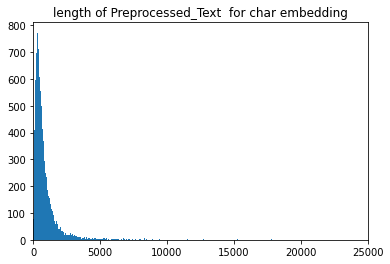

In [ ]:
#to check the length so as to pad the sequences accordingly

length=[]
for i in X_train_ce['Preprocessed CE']:
    length.append(len(i))
length=np.array(length)

##plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(length,bins=1000)
plt.xlim(0,25000)
plt.title('length of Preprocessed_Text  for char embedding')

The above plot shows that majority of the file has a length of around 7000, this information will be beneficial for the selection of padding of the sequences.

In [ ]:
#encoding the sequences with the given tokens
encoded_X_train_ce=tokenizer_ce.texts_to_sequences(X_train_ce['Preprocessed CE'])
encoded_X_test_ce=tokenizer_ce.texts_to_sequences(X_test_ce['Preprocessed CE'])

#sequence padding
from keras.preprocessing.sequence import pad_sequences
padded_X_train_ce=pad_sequences(encoded_X_train_ce,maxlen=7000,padding='post')
padded_X_test_ce=pad_sequences(encoded_X_test_ce,maxlen=7000,padding='post')
padded_X_train_ce[0].shape

(7000,)

In [ ]:
#reference=https://machinelearningmastery.com/start-here/
# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/glove.840B.300d-char.txt')
for line in tqdm(f):
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))


In [ ]:
#reference=https://machinelearningmastery.com/start-here/
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size_ce, 300))
#print('embedding_matrix shape : ',embedding_matrix.shape)
for word, i in tokenizer_ce.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

print('embedding_matrix shape : ',embedding_matrix.shape)

embedding_matrix shape :  (39, 300)


#Model 2

In [ ]:
#importing layers from tensorflow module
from tensorflow.keras.layers import Conv1D,Dense,Embedding,Flatten,GlobalMaxPool1D,MaxPool1D,concatenate,Input,Activation,Dropout
from tensorflow.keras.models import Model
! pip install -q pyyaml h5py

#clearing the tf graph
tf.keras.backend.clear_session()
#clear the tensorboard graph
tf.compat.v1.reset_default_graph()

In [ ]:
import datetime
!rm -rf ./logs/  # clearing the previous logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # defing the log_dir
#loading the tensorboard extension
%load_ext tensorboard

from tensorflow.keras.callbacks import ModelCheckpoint
#defining the file path for saving the weights
#filepath="/content/drive/My Drive/Colab Notebooks/question 20/model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hf5"

filepath="/content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  save_weights_only=True, verbose=1, save_best_only=True, mode='max',save_freq='epoch')


#importing the ealy stopping for val_accuracy
ES=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=4, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

#built-in tensorboard call back
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True,write_grads=True)


callback_list=[checkpoint,ES,tensorboard_callback]

In [ ]:
#definining model-2

Input_shape=7000

input_layer_1=Input(shape=(Input_shape,))

embedding_1=Embedding(vocab_size_ce,300,weights=[embedding_matrix],input_length=Input_shape,trainable=False)

embedding_layer=embedding_1(input_layer_1)

conv1_n=Conv1D(filters=7,kernel_size=3,strides=(1),padding='valid',activation='relu',data_format='channels_last')(embedding_layer)
conv1_m=Conv1D(filters=9,kernel_size=3,strides=(1),padding='valid',activation='relu')(conv1_n)

max_1=MaxPool1D(pool_size=3)(conv1_m)

conv2_k=Conv1D(filters=5,kernel_size=3,strides=(1),padding='valid',activation='relu')(max_1)
conv2_t=Conv1D(filters=3,kernel_size=3,strides=(1),padding='valid',activation='relu')(conv2_k)

max_2=MaxPool1D(pool_size=3)(conv2_t)

flat_1=Flatten()(max_2)

drop=Dropout(0.2)(flat_1)

dense_1=Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=None))(drop)

dense_2=Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=None))(dense_1)

output_layer_1=Dense(20,activation='softmax')(dense_2)

model_2 = Model(inputs=input_layer_1,outputs=output_layer_1)


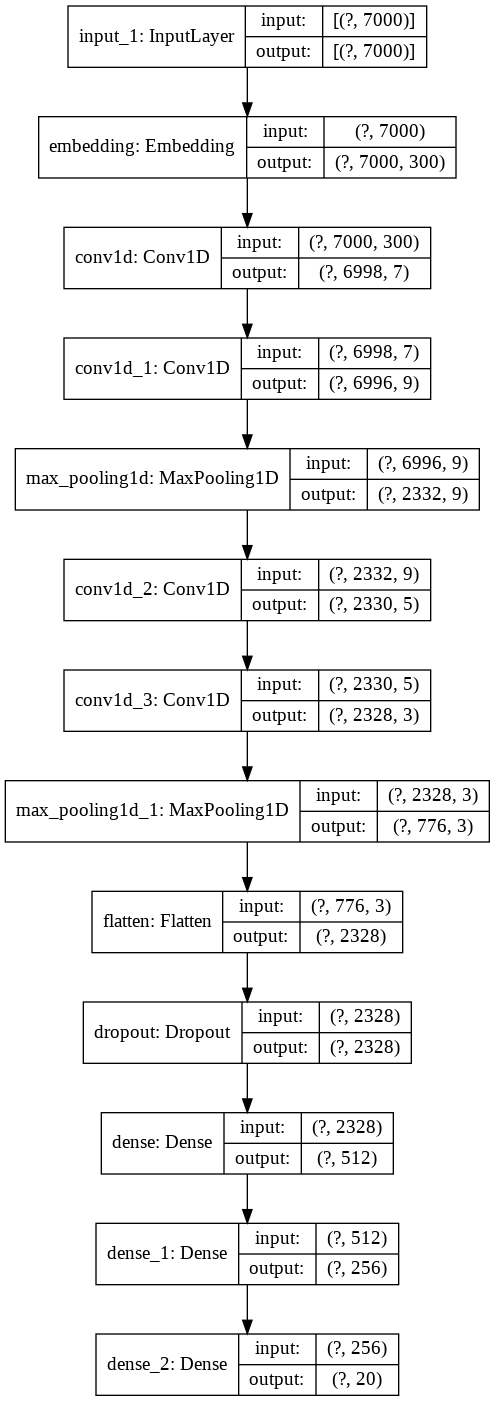

In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'model_2.png', show_shapes=True)

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7000)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 7000, 300)         11700     
_________________________________________________________________
conv1d (Conv1D)              (None, 6998, 7)           6307      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6996, 9)           198       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2332, 9)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2330, 5)           140       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2328, 3)           48    

In [ ]:
#compiling the model-2
model_2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

#fitting the model-2
model_2.fit(padded_X_train_ce,y_train,steps_per_epoch=18,validation_data=(padded_X_test_ce,y_test),epochs=100,callbacks=callback_list)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2.9909 - accuracy: 0.0712
Epoch 00001: val_accuracy improved from -inf to 0.08519, saving model to /content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5
18/18 [==============================] - 38s 2s/step - loss: 2.9909 - accuracy: 0.0712 - val_loss: 2.9793 - val_accuracy: 0.0852
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 2.9784 - accuracy: 0.0831
Epoch 00002: val_accuracy improved from 0.08519 to 0.08880, saving model to /content/drive/My Drive/Colab Notebooks/24-Document Classification with CNN/best_weights_1.h5
18/18 [==============================] - 32s 2s/step - loss: 2.9784 - accuracy: 0.0831 - val_loss: 2.9726 - val_accuracy: 0.0888
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 2.9731 - accuracy: 0.0860
Epoch 00003: val_accuracy did not improve from 0.08880
18/18 [==============================] - 31s 2s/step - loss: 2.97

In [ ]:

%tensorboard --logdir logs/fit/ #to launch tensorboard
#screenshots have been attached in the seperate pdf file

#Observations :

(1) We have achieved around 9% validation accuracy for the model-2 with the given architecture, at 18th epoch out of 100

(2) The accuracy can be justified to the model architecture as well as it was mentioned in the Yann LeCun's papers that small no. of data-points in the training data set may lead to low accuracy.

(3) I have also added a dense layer to the model's architecture after the flatten layer to improve accuracy.

Note: All the scalers of the tensorboard have been attached in the following pdf file model-2

Note: Micro averaged-F1 score is same as accuracy (here Validation Accuracy ), so need to calculate it seperately :  
https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1#:~:text=To%20calculate%20the%20micro%2DF1,TP%2F(TP%2BFP)).